<figure>
  <IMG SRC="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Fachhochschule_Südwestfalen_20xx_logo.svg/320px-Fachhochschule_Südwestfalen_20xx_logo.svg.png" WIDTH=250 ALIGN="right">
</figure>

# Data Mining
### Winterersemester 2025/25
Prof. Dr. Stefan Goetze

# Entscheidungsbäume

Ein Entscheidungsbaum ist ein prädiktives Modell, das ein Beispiel $\mathbf{x}$, beschrieben durch eine Reihe von prädiktiven Merkmalen und deren jeweiligen Werten, verwendet und einen vorhergesagten Wert für das Zielmerkmal zurückgibt.

Ein Entscheidungsbaum kann im Kontext von Klassifikations- und Regressionsaufgaben erstellt werden, wie wir weiter unten sehen werden.

## Entscheidungsbäume zur Klassifizierung

### Ein einfaches Beispiel: Wie überlebt man den Untergang der Titanic?

#### Datensatz "Titanic: Machine Learning from Disaster"

Das folgende Beispiel beschreibt die Entwicklung eines [Entscheidungsbaums](https://en.wikipedia.org/wiki/Decision_tree_learning), der die Überlebenswahrscheinlichkeit der Passagiere der [Titanic-Katastrophe ("Titanic: Machine Learning from Disaster")](https://de.wikipedia.org/wiki/Titanic_(Schiff)) modelliert. Hierzu wurde ein [Datensatz](https://www.kaggle.com/c/titanic) erstellt, der über die Plattform [Kaggle](https://www.kaggle.com/) verfügbar ist. Er basiert auf den Passagierdaten des Passagierdampfers [RMS Titanic](https://de.wikipedia.org/wiki/Titanic_(Schiff)), der im Jahr $1912$ nach einer Kollision mit einem Eisberg sank. Die RMS Titanic galt $1912$ als technisches Meisterwerk und als nahezu „unsinkbar“. Auf ihrer Jungfernfahrt kollidierte sie am $14$. April gegen $23$:$40$ Uhr mit einem Eisberg und sank in den frühen Morgenstunden des $15$. April. Etwa $705$ Menschen konnten von der Carpathia gerettet werden, während rund $1517$ starben [1].

[1]: J. Rosenberg, “Sinking of the RMS Titanic,” *ThoughtCo.*, Apr. 2020. https://www.thoughtco.com/sinking-of-the-titanic-1779225

##### Übersicht der Merkmale im Datensatzes "Titanic: Machine Learning from Disaster":

Der Datensatz "Titanic: Machine Learning from Disaster" enthält die in der folgenden Tabelle zusammengefassten Informationen (Merkmale) und somit u.A. die `PassengerId` und Informationen darüber, ob die betreffende Person überlebt hat (`Survived`), was wir in diesem Notebook durch einen Entscheidungsbaum vorherzusagen versuchen.

<center>

Tabelle 1.: Informationen (Merkmale) des Datensatzes ["Titanic: Machine Learning from Disaster"](https://www.kaggle.com/c/titanic).

Spalte	      | Beschreibung
--------------|---------------------
`PassengerId` | Eindeutige ID des Passagiers (laufende Nummer)
`Survived`    | Zielvariable: 0 = nicht überlebt, 1 = überlebt
`Pclass`      | Passagierklasse: 1 = Erste, 2 = Zweite, 3 = Dritte Klasse
`Name`        | Name des Passagiers, inkl. Titel
`Sex`         | Geschlecht: male oder female
`Age`         | Alter in Jahren 
`SibSp`       | Anzahl mitreisender Geschwister oder Ehepartner an Bord
`Parch`       | Anzahl mitreisender Eltern oder Kinder an Bord
`Ticket`      | Ticketnummer
`Fare`        | Ticketpreis (in britischen Pfund)
`Cabin`       | Kabinennummer 
`Embarked`    | Zustiegshafen: C = Cherbourg, Q = Queenstown, S = Southampton  

</center>

##### Ein einfacher Entscheidungsbaum (Decision Tree)

Ein Entscheidungsbaumist ein Algorithmus des überwachten Lernens (Supervised Learning), der sowohl für Klassifikations- als auch Regressionsaufgaben eingesetzt wird. Er basiert auf einer hierarchischen Baumstruktur, die aus einem oberen Wurzelknoten zum Start (Root), inneren Entscheidungsknoten, Kanten und Blättern besteht.

Durch eine Abfolge von Entscheidungsregeln (z. B. Geschlecht: weiblich? oder Alter $< 10$ Jahre?) werden Daten entlang von Pfaden im Baum geführt. An jedem Knoten erfolgt eine Entscheidung (`True`, `False`) basierend auf dem Wert eines bestimmten Merkmals. Auf diese Weise werden die Daten in immer kleinere Teilmengen unterteilt, bis am Ende in den Blättern eine Vorhersage in Bezug auf die Zielvariable getroffen werden kann (z. B. „Überlebt“ / „Nicht überlebt“).

Nachfolgend ist in Abbildung $1$ ein einfacher Entscheidungsbaum dargestellt, der das wahrscheinliche Überleben der Titanic-Passagiere "hervorsagt". 

Das Merkmal `sipsb` entspricht der Anzahl der Geschwister (*engl.: siblings*) oder (Ehe-)Partner (*engl.: spouses*) an Bord. Die anderen prädiktiven Merkmale sollten selbsterklärend sein. 

<center>

![Entscheidungsbaum zur Vorhersage des Überlebens von Titanic-Passagieren. Der Baum beginnt mit der Frage, ob das Geschlecht männlich ist. Bei Nein wird Überleben mit Wahrscheinlichkeit 0.73 und Anteil 36 Prozent vorhergesagt. Bei Ja folgt die Frage, ob das Alter größer als 9.5 ist. Ist dies der Fall, wird Tod mit Wahrscheinlichkeit 0.17 und Anteil 61 Prozent vorhergesagt. Ist das Alter kleiner oder gleich 9.5, folgt die Frage, ob die Anzahl der Geschwister oder Ehepartner (sibsp) größer als 2.5 ist. Bei Ja wird Tod mit Wahrscheinlichkeit 0.05 und Anteil 2 Prozent vorhergesagt. Bei Nein wird Überleben mit Wahrscheinlichkeit 0.89 und Anteil 2 Prozent vorhergesagt. Die Darstellung ist sachlich und informativ, mit farblich hervorgehobenen Knoten für Überleben (grün) und Tod (rot) in einer klaren Baumstruktur.](https://upload.wikimedia.org/wikipedia/commons/f/f3/CART_tree_titanic_survivors.png)

Abbildung $1$: Beispiel für einen einfachen Entscheidungsbaum.

</center>

Die Zahlen unter den Blättern zeigen die Überlebenswahrscheinlichkeit und den Prozentsatz der Beispiele aus dem genutzten Datensatz auf dem entsprechenden Blatt an.

Ein Entscheidungsbaum besteht aus mehreren (internen und externen) *Knoten*. Letztere (im Bild grün und rot dargestellte Knoten) werden auch als *Blätter* bezeichnet. Jeder interne Knoten ist einem Prädikat zugeordnet, das eines der prädiktiven Merkmale beinhaltet. Jedes Blatt ist einem einzelnen Wert des Zielmerkmals zugeordnet. Der oben als Beispiel angegebene Baum enthält drei interne Knoten (für die Merkmale „Geschlecht“ (`sex`), „Alter“ (`age`) und „Geschwister“ & "Partner" (`sibsp`)) und vier externe Knoten.

Der dargestellte Entscheidungsbaum ist ein Klassifikationsmodell, das die Klasse für ein neues Beispiel durch Ausführen einer Testsequenz bestimmen kann.

* Jeder interne Knoten im Baum entspricht einem Test für den Wert eines der Attribute.

* Die Zweige jedes internen Knotens sind mit den möglichen Testwerten gekennzeichnet.

* Jeder Blattknoten gibt den Wert an, der zurückgegeben werden soll, wenn dieses Blatt erreicht wird.

Entscheidungsbäume sind für ihre einfache Interpretatierbarkeit bekannt. Im obigen Beispiel können wir interpretieren, dass die Überlebenschancen für (i) eine Frau oder (ii) einen Mann unter $9,5$ Jahren und weniger als $2,5$ Geschwistern (oder Ehepartnern) höher waren.

Es stellt sich die Frage, wie die Knoten und entsprechende Regeln aufgestellt werden, also wie der Baum so entworfen wird, dass er das bestmögliche Vorhersageergebnis liefert. Bevor wir dazu kommen wollen wir uns aber den Datensatz erst genauer ansehen (und einschränken).

#### Datenaufbereitung

Zunächst laden wir den Trainingsdatensatz herunter und sehen uns die ersten $10$ Zeilen (als [Padas](https://pandas.pydata.org/) [frame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)) mit dem Befehl [`head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) an.

In [1]:
import pandas as pd
df_titanic = pd.read_csv('https://raw.githubusercontent.com/fhswf/VSAI-Data-Mining/refs/heads/main/datasets/titanic_train.csv')
df_titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Der [info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html)-Befehl gibt und weitere Informationen.

In [2]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Wir sehen, dass der Datensatz nur Informationen über $891$ Passagiere enthält und dass die Merkmale `Cabin` und `Age` fehlende Werte aufweisen, die wir (optional) auch mit folgendem Code visualisieren können.

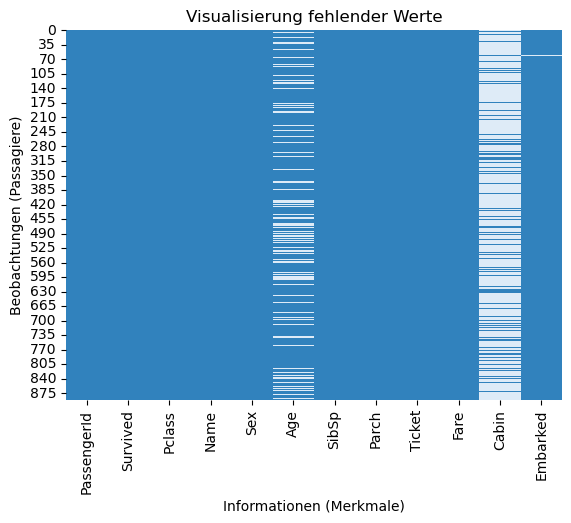

In [3]:
import matplotlib.pyplot as plt                       # für Visualisierungen
from matplotlib.colors import LinearSegmentedColormap # für benutzerdefinierte Farbskalen
import seaborn as sns                                 # für erweiterte Visualisierungen


custom_cmap = LinearSegmentedColormap.from_list("custom_blue", ['#3182bd', '#deebf7'])
sns.heatmap(df_titanic.isnull(), cbar = False, cmap=custom_cmap)
plt.title('Visualisierung fehlender Werte'); plt.xlabel('Informationen (Merkmale)'); plt.ylabel('Beobachtungen (Passagiere)');

Wir beschränken unseren Datensatz im Folgenden auf die *Spalten* (Merkmale) `Sex`, `Age`, `SibSp`, `Survived`, und `Pclass`.

In [4]:
df_titanic = df_titanic[['Sex', 'Age', 'SibSp', 'Survived', 'Pclass']]
df_titanic.head(10)

,Sex,Age,SibSp,Survived,Pclass
0,male,22.0,1,0,3
1,female,38.0,1,1,1
2,female,26.0,0,1,3
3,female,35.0,1,1,1
4,male,35.0,0,0,3
5,male,NaN,0,0,3
6,male,54.0,0,0,1
7,male,2.0,3,0,3
8,female,27.0,0,1,3
9,female,14.0,1,1,2


In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Age       714 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Survived  891 non-null    int64  
 4   Pclass    891 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 34.9+ KB


Das [*nominale*](https://de.wikipedia.org/wiki/Nominalskala) Merkmal `Sex` (vom Typ String) wandeln wir in einen Zahlwert und entfernen fehlende Einträge ([`NaN`s](https://de.wikipedia.org/wiki/NaN)) im Datensatz durch die Funktion [`fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html):

In [6]:
df_titanic.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)
df_titanic.fillna(df_titanic.mean(), inplace=True)
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    int64  
 1   Age       891 non-null    float64
 2   SibSp     891 non-null    int64  
 3   Survived  891 non-null    int64  
 4   Pclass    891 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


/var/folders/qd/qswd09850k72n4c49br1gppm0000gn/T/ipykernel_12887/444600397.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_titanic.replace({'Sex': {'male': 0, 'female': 1}}, inplace=True)


In [7]:
df_titanic.head(10)

,Sex,Age,SibSp,Survived,Pclass
0,0,22.000000,1,0,3
1,1,38.000000,1,1,1
2,1,26.000000,0,1,3
3,1,35.000000,1,1,1
4,0,35.000000,0,0,3
5,0,29.699118,0,0,3
6,0,54.000000,0,0,1
7,0,2.000000,3,0,3
8,1,27.000000,0,1,3
9,1,14.000000,1,1,2


Nun teilen wir des Datensatz in Trainingsdaten $\mathbf{X}$ und Labels $\mathbf{y}$ auf.

In [8]:
X = df_titanic.drop(columns=['Survived'])
y = df_titanic['Survived']

#### Entwurf des Entscheidungsbaums - Schritte des Algorithmus

Ziel eines *Entscheidungsbaum-Lernalgorithmus* ist die Erstellung eines Entscheidungsbaums. Der grundlegende Entscheidungsbaum-Lernalgorithmus besteht aus den folgenden Schritten:

1. Beginnen Sie mit dem Wurzelknoten als übergeordnetem Knoten.
2. Teilen Sie den übergeordneten Knoten anhand des Attributs auf, das die Summe der Unreinheiten (engl.: *impurities*) in den untergeordneten Knoten minimiert (oder den *Informationsgewinn* maximiert).
3. Weisen Sie den neuen untergeordneten Knoten Trainingsbeispiele zu.
4. Beenden Sie den Prozess, wenn die resultierenden Knoten *rein* sind (oder ein Abbruchkriterium erfüllt ist). Wiederholen Sie die Schritte 1 und 2 für jeden neuen untergeordneten Knoten.

Die folgende Abbildung $2$ veranschaulicht das rekursive Verfahren des Entscheidungsbaum-Lernalgorithmus. Hier besteht der Datensatz aus $14$ Beispielen, $6$ positiven und $9$ negativen. Jeder Datenpunkt hat zwei Merkmale (in der Animation als X und Y dargestellt) mit Wertebereichen zwischen $0$ und $1$. Die Animation zeigt, dass der Erstellungsprozess mit einem Baum mit nur einem Knoten (dem Wurzelknoten) beginnt, der dem Merkmal X zugeordnet ist. Beachten Sie, dass das Prädikat $X>0,5$ die ursprünglichen Beispiele in zwei disjunkte Mengen aufteilt. Beachten Sie auch, dass die dem Wert „Ja“ für das Prädikat zugeordneten Beispiele alle negativ sind. Diese Beispiele sind einem Blattknoten zugeordnet. Die zweite Menge hingegen enthält sechs positive und drei negative Beispiele. Da in dieser Menge Unreinheiten vorhanden sind, muss der entsprechende Knoten aufgeteilt werden. Dieser Prozess der Knotenaufteilung wird fortgesetzt, bis bestimmte *Abbruchkriterien* erfüllt sind. Am Ende dieses Prozesses wird ein Entscheidungsbaum erstellt.

<center>

![Animation des Aufbaus eines Entscheidungsbaums](https://annalyzin.files.wordpress.com/2016/07/decision-tree-tutorial-animated3.gif?w=620)

Abbildung $2$: Animation des Aufbaus eines Entscheidungsbaums ([Quelle](https://annalyzin.wordpress.com/2016/07/27/decision-trees-tutorial/)).

</center>

Es gibt mehrere mögliche Abbruchkriterien:
* Blattknoten sind rein
* Maximale Knotentiefe ist erreicht
* Die Teilung eines Knotens führt nicht zu einem *Informationsgewinn*.

Aus dem obigen Beispiel sollte deutlich werden, dass der Entscheidungsbaumalgorithmus bei einer notwendigen Knotenteilung das beste Attribut auswählen kann. Wir nennen dies die *Attributauswahlkriterien*.

### Kriterien für die Attributauswahl

Der Algorithmus zum Lernen von Entscheidungsbäumen ist rekursiv. Beim Erstellen des Modells (d. h. des Entscheidungsbaums) sollte die Auswahl der Merkmale so erfolgen, dass die Tiefe des Entscheidungsbaums minimiert wird. In jedem Schritt wählt der Algorithmus das Merkmal aus, das die genaue Klassifizierung der Beispiele am besten abdeckt.

Ein perfektes Merkmal würde die Beispiele in Teilmengen derselben Klasse unterteilen (d. h. alle positiv oder alle negativ). Um ein geeignetes Merkmal für einen neuen internen Knoten im Baum auszuwählen, wird jedes Merkmal anhand des erwarteten Informationsgehalts bewertet.

Die Auswahl der optimalen Aufteilung an einem Knoten basiert auf dem Prinzip des Informationsgewinns oder Reinheit. Es wird jeweils die Aufteilung gewählt, durch die sich die Daten in Bezug auf die Zielvariable möglichst homogen gruppieren lassen. Es gibt zwei gängige Kriterien für die Merkmalsauswahl beim Lernen eines Entscheidungsbaums:

* Informationsgewinn (basierend auf Entropie)
* Gini-Index

### Informationsgewinn

Der Informationsgewinn basiert auf einem Maß aus der [Informationstheorie](en.wikipedia.org/wiki/Information_theory), das *Entropie* genannt wird.

Gegeben sei eine Wahrscheinlichkeitsverteilung für eine diskrete Zufallsvariable $V$ mit $n$ möglichen Werten. Wenn jeder mögliche Wert $v_i$ von $V$ die Wahrscheinlichkeit $p_i$ hat, dann wird die Entropie $H$ dieser Zufallsvariable durch folgende Formel beschrieben:

$$
H(V) = -\sum_{v_i \in V} p_i \log_2 p_i
$$

Die folgende Codezelle zeigt den Graphen der Entropiefunktion für eine Zufallsvariable, die nur zwei Werte annehmen kann, mit den entsprechenden Wahrscheinlichkeiten $p_1 = p$ und $p_2 = 1-p$.


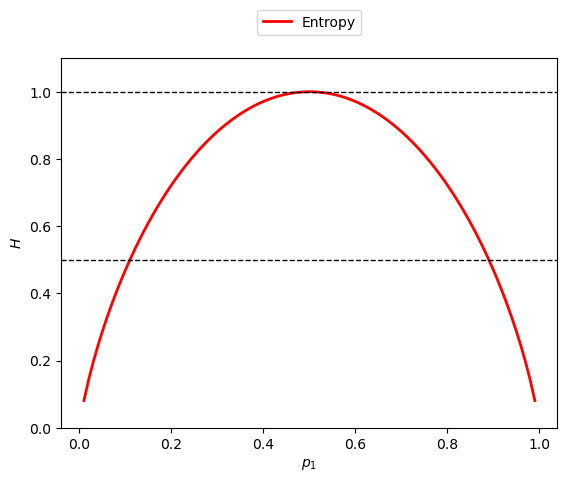

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))

x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent],
                          ['Entropy'],
                          ['-', '-', '--', '-.'],
                          ['red', 'blue', 'black', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('$p_1$')
plt.ylabel('$H$')
plt.show()

In dem oben gezeigten Diagramm ist zu erkennen, dass $H$ ihr Maximum erreicht, wenn beide Werte mit gleicher Wahrscheinlichkeit auftreten (d. h. $p_1 = p_2 = 0.5$).

Um ein besseres Verständnis für das Konzept der Entropie zu bekommen, betrachte die folgende Codezelle, die weitere Werte zeigt, die von $H$ im Fall einer binären Zufallsvariablen erzeugt werden.
Es wird außerdem empfohlen, dieses anschauliche und lehrreiche [Video](https://youtu.be/9r7FIXEAGvs) über das Konzept der Entropie anzusehen.


In [10]:
print('H(0.5, 0.5): %.2f' % entropy(1/2))
print('H(0.1, 0.9): %.2f' % entropy(0.1))
print('H(0.01, 0.99): %.2f' % entropy(0.01))
print('H(0.001, 0.999): %.2f' % entropy(0.001))

H(0.5, 0.5): 1.00
H(0.1, 0.9): 0.47
H(0.01, 0.99): 0.08
H(0.001, 0.999): 0.01


Entropie kann verwendet werden, um die Homogenität eines Datensatzes in Bezug auf die Werte des Zielattributs $T$ in einer Menge von Beispielen zu messen. Wenn $T$ für alle Beispiele im Datensatz denselben Wert hat, ist die Entropie minimal. Tritt dagegen jedes mögliche Ergebnis von $T$ mit gleicher Wahrscheinlichkeit auf, so ist die Entropie maximal.

Betrachten wir nun ein Prädiktorattribut $A$ mit $n$ möglichen Werten. Außerdem betrachten wir alle $n$ Teilmengen $S_i$, die entstehen, wenn eine ursprüngliche Beispielsmenge $S$ nach den Werten von $A$ aufgeteilt wird.
Die Entropie misst nur die Homogenität einer einzelnen (Teil-)Menge von Beispielen. Daraus ergibt sich die Frage, wie man die Homogenität der gesamten Aufteilung (d. h. aller Werte von $A$) berechnen kann.
Die Lösung besteht darin, einen gewichteten Durchschnitt der Entropien für jede Teilmenge zu berechnen.
Wenn also $T$ das Zielattribut und $A$ ein Prädiktorattribut ist, wird die gewichtete durchschnittliche Entropie von $T$ in Bezug auf die durch $A$ erzeugte Aufteilung wie folgt berechnet:

$$
H(T \mid A) = \sum_{v_i \in A} \frac{|S_i|}{|S|} H(T \mid S_i)
$$

In dieser Formel gilt:

* $S_i$ ist die Menge der Beispiele mit dem Wert $v_i$ für $A$
* $S = \cup_i S_i$
* $H(T \mid S_i)$ ist die Entropie von $T$ innerhalb der Teilmenge $S_i$

Der **Informationsgewinn (IG)** eines Prädiktorattributs $A$ ist die Differenz zwischen der Entropie des Zielattributs $T$ vor und nach der Aufteilung des Datensatzes anhand der Werte von $A$:

$$
IG(A) = H(T) - H(T \mid A)
$$

Das Auswahlkriterium, das auf Informationsgewinn basiert, wählt das Prädiktorattribut, das den höchsten Informationsgewinn unter allen verfügbaren Attributen erzeugt.
Beachte, dass das **Maximieren des Informationsgewinns** $IG(A)$ gleichbedeutend ist mit dem **Minimieren der durchschnittlichen Entropie** $H(T \mid A)$, da $H(T)$ für alle Attribute $A$ konstant ist.

---

Als Beispiel betrachten wir den folgenden Beispieldatensatz, der vier Prädiktorattributen enthält: `Outlook`, `Temp`, `Humidity` und `Windy`.
`PlayGolf` ist das Zielattribut.

![alt text](https://miro.medium.com/max/661/0*DX1px-z340TgpXTN.png)

Wenn wir den obigen Datensatz nach den Werten des Attributs `Outlook` aufteilen, erhalten wir drei neue Teilmengen, wie in der folgenden Abbildung gezeigt:

![alt text](https://miro.medium.com/max/446/0*N01l6jqQtVXvsEyk.png)

Wir können nun die Entropie $H(\text{PlayGolf})$ des Attributs `PlayGolf` im ursprünglichen Datensatz berechnen.
Ebenso können wir $H(\text{PlayGolf} \mid \text{Outlook})$ berechnen – die gewichtete durchschnittliche Entropie von `PlayGolf`, basierend auf den drei Teilmengen, die durch die Aufteilung nach `Outlook` entstehen.
Schließlich ergibt sich der Informationsgewinn für das Attribut `Outlook` zu:

$$
IG(\text{Outlook}) = H(\text{PlayGolf}) - H(\text{PlayGolf} \mid \text{Outlook})
$$


Lass uns nun den Wert von $IG(\text{Outlook})$ berechnen.
Dazu betrachten wir die folgenden Wahrscheinlichkeitswerte:

$$
\begin{aligned}
\Pr(\text{Outlook} = Sunny) &= 5/14 \\
\Pr(\text{Outlook} = Overcast) &= 4/14 \\
\Pr(\text{Outlook} = Rainy) &= 5/14
\end{aligned}
$$


In [11]:
import numpy as np

entropy_playgolf = -(((9/14) * np.log2(9/14) + (5/14) * np.log2(5/14)))
print('H(PlayGolf): %.3f' %  entropy_playgolf)

entropy_playgolf_sunny = -(((3/5) * np.log2(3/5) + (2/5) * np.log2(2/5)))
entropy_playgolf_overcast = 0 # all values of PlayGolf are 'yes'
entropy_playgolf_rainy = -(((2/5) * np.log2(2/5)) + ((3/5) * np.log2(3/5)))

entropy_playgolf_outlook = (5/14)*entropy_playgolf_sunny + (4/14)*entropy_playgolf_overcast + (5/14)*entropy_playgolf_rainy
print('H(PlayGolf | Outlook): %.3f' % (entropy_playgolf_outlook))

print('IG(Outlook): %.3f' % (entropy_playgolf - entropy_playgolf_outlook))

H(PlayGolf): 0.940
H(PlayGolf | Outlook): 0.694
IG(Outlook): 0.247


Der Informationsgewinn für die anderen prädiktiven Attribute kann auf ähnliche Weise berechnet werden. Somit haben wir:

* $IG(\text{Outlook}) = H(\text{PlayGolf}) - H(\text{PlayGolf} \mid \text{Outlook}) = 0{,}247$

* $IG(\text{Temp}) = H(\text{PlayGolf}) - H(\text{PlayGolf} \mid \text{Temp}) = 0{,}029$

* $IG(\text{Humidity}) = H(\text{PlayGolf}) - H(\text{PlayGolf} \mid \text{Humidity}) = 0{,}152$

* $IG(\text{Windy}) = H(\text{PlayGolf}) - H(\text{PlayGolf} \mid \text{Windy}) = 0{,}048$

Da der größte Wert für $IG$ mit `Outlook` verbunden ist, sollte gemäß dem Kriterium des Informationsgewinns dieses Attribut ausgewählt werden, um den Baum weiter wachsen zu lassen.


In Scikit-Learn kann die Funktion [mutual_info_classif](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) verwendet werden, um den Informationsgewinn für eine Menge prädiktiver Attribute in Bezug auf ein Zielattribut zu berechnen, wie im folgenden Beispiel gezeigt.


In [12]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X, y)
print(mi)

[0.14861103 0.02294063 0.0170081  0.05973616]


Aus den obigen Werten können wir schließen, dass das Attribut `Sex` als Wurzel des Baums ausgewählt werden sollte.


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     891 non-null    int64  
 1   Age     891 non-null    float64
 2   SibSp   891 non-null    int64  
 3   Pclass  891 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 28.0 KB


### Gini-Impurität (auch Gini-Index genannt)

Betrachten wir eine Menge von Beispielen $S$ und ein Zielattribut $T$ mit $n$ möglichen Werten. Außerdem sei $p_j$ die Wahrscheinlichkeit des $j$-ten Werts von $T$ ($1 \leq j \leq n$). Die Gini-Impurität für $T$ unter Berücksichtigung der Beispiele in $S$ wird wie folgt definiert:

$$
I_G(T \mid S) = 1 - \sum_{j}^n p_j^2
$$

Anschließend können wir den Gini-Index unter Berücksichtigung aller durch die Werte von $A$ erzeugten Aufteilungen berechnen:

$$
G(T \mid A) = \sum_{v_i \in A} \frac{|S_i|}{|S|} I_G(T \mid S_i)
$$

Während des Lernprozesses eines Entscheidungsbaums sollte gemäß dem Gini-Kriterium das prädiktive Attribut mit dem kleinsten Wert von $G(T \mid A)$ unter den verfügbaren Attributen ausgewählt werden.


Als Beispiel betrachten wir erneut den Datensatz PlayGolf.

![alt text](https://miro.medium.com/max/446/0*N01l6jqQtVXvsEyk.png)

Berechnen wir $I_G$ für jede Aufteilung, die durch die Werte des Attributs Outlook erzeugt wird:

$$
\begin{aligned}
I_G(\text{PlayGolf} \mid \text{Outlook} = \text{'Sunny'}) &= 1 - \left[ (3/5)^2 + (2/5)^2 \right] = 0{,}48 \
I_G(\text{PlayGolf} \mid \text{Outlook} = \text{'Overcast'}) &= 1 - \left[ (4/4)^2 + (0/4)^2 \right] = 0 \
I_G(\text{PlayGolf} \mid \text{Outlook} = \text{'Rainy'}) &= 1 - \left[ (2/5)^2 + (3/5)^2 \right] = 0{,}48
\end{aligned}
$$

Nun können wir $G(\text{PlayGolf} \mid \text{Outlook})$ berechnen:

$$
G(\text{PlayGolf} \mid \text{Outlook}) = (5/14) \times 0{,}48 + (4/14) \times 0 + (5/14) \times 0{,}48 \approx 0{,}342
$$


In [14]:
def gini_split(dict_split):
  """Compute impurity for given split

  dict_split is a dictionary in which the i-th entry is a
   tuple with the following structure: (s_i, g_i)
      s_i -- the size of S_i subset
      g_i -- I_G(S_i)
  """

  total_sz = 0
  for k, v in dict_split.items():
    print(k,v)
    total_sz = total_sz + v[0]

  s = 0
  for k, v in dict_split.items():
    s = s + (v[0]/total_sz) * v[1]

  return s

In [15]:
split = dict()
split[1] = (5, 0.48)
split[2] = (4, 0)
split[3] = (5, 0.48)
gini_split(split)

1 (5, 0.48)
2 (4, 0)
3 (5, 0.48)


0.34285714285714286

Das folgende Beispiel veranschaulicht grafisch den Unterschied zwischen Entropie und Gini-Index. Es ist zu erkennen, dass es keine großen Unterschiede zwischen diesen beiden Maßen gibt.


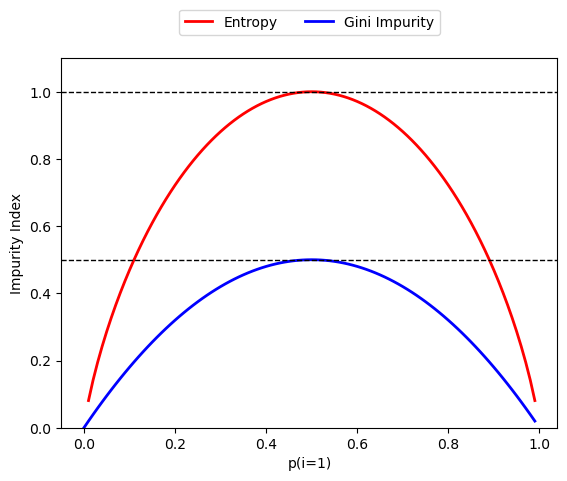

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


def entropy(p):
    return - p * np.log2(p) - (1 - p) * np.log2((1 - p))


x = np.arange(0.0, 1.0, 0.01)

ent = [entropy(p) if p != 0 else None for p in x]

fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, gini(x)],
                          ['Entropy', 'Gini Impurity'],
                          ['-', '-', '--', '-.'],
                          ['red', 'blue', 'black', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=5, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

## Entscheidungsbaum-Klassifikator in Scikit-Learn

In Scikit-Learn implementiert mit der Klasse [`DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) einen anpassbaren Algorithmus zum Lernen von Entscheidungsbäumen. Das folgende Codebeispiel veranschaulicht die Verwendung dieser Klasse. Das Beispiel bezieht sich auf den Iris-Datensatz. Hier repräsentieren das dritte und vierte Attribut die Blütenblattlänge und -breite jeder Blume. Die Klassen wurden bereits in Ganzzahl-Labels umgewandelt, wobei 0 = Iris-Setosa, 1 = Iris-Versicolor, 2 = Iris-Virginica gilt.


In [17]:
from sklearn.metrics import accuracy_score
from sklearn import datasets
import numpy as np
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()

# petal length and petal width
X = iris.data[:, [2, 3]]

# response vector
y = iris.target

print('Class labels:', np.unique(y))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

tree = DecisionTreeClassifier(criterion='gini', #'entropy'
                              max_depth=4,
                              random_state=1)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print('Accuracy on test set: %.2f' % accuracy_score(y_test, y_pred))

Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]
Accuracy on test set: 0.98


Wir können auch die Entscheidungsgrenzen dieses Modells visualisieren. Siehe unten.


/var/folders/qd/qswd09850k72n4c49br1gppm0000gn/T/ipykernel_12887/1322135174.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


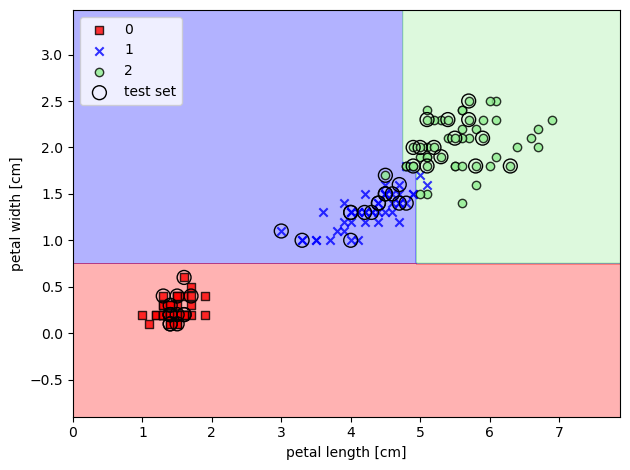

In [18]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolors='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                      classifier=tree, test_idx=range(105, 150))

plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Entscheidungsbäume für Regression

Entscheidungsbäume können auch für Regressionsaufgaben verwendet werden. In diesem Fall sollte jedoch eine Impuritätsmetrik verwendet werden, die für kontinuierliche Variablen geeignet ist (anstelle des Gini-Index oder des Informationsgewinns). Außerdem ist der von einem Blattknoten in einem Regressionsbaum vorhergesagte Wert der Durchschnitt der Zielwerte der Beispiele in diesem Blatt.

Eine mögliche Metrik ist der mittlere quadratische Fehler (MSE). Insbesondere kann zur Quantifizierung des Impuritätsgrades $I(t)$ in einem Knoten $t$ des zu bauenden Entscheidungsbaums die folgende Formel angewendet werden:

$$
I(t) = \operatorname{MSE}(t) = \frac{1}{m_t}  \sum_{i \in D_t} (y^{(i)} - \overline{y}_t)^2
$$

$$
\overline{y}*t = \frac{1}{m_t} \sum*{i \in D_t} y^{(i)}
$$

In den obigen Ausdrücken:

* $D_t$ ist die Trainingsuntermenge am Knoten $t$.

* $m_t$ ist die Größe von $D_t$ (d. h. die Anzahl der Trainingsbeispiele am Knoten $t$).

* $y^{(i)}$ ist der tatsächliche Wert des Zielmerkmals für das $i$-te Trainingsbeispiel in $D_t$.

* $\overline{y}_t$ ist der Durchschnitt der vorhergesagten Werte für die Beispiele in $D_t$.

Quelle: Python Machine Learning, 2. Auflage, S. 341


In [22]:
import numpy as np
expl = np.array([2.5, 2.5, 2.5, 2.5])
print(expl.mean())

2.5


Das folgende Beispiel veranschaulicht die Verwendung der Klasse [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), die in Scikit-Learn vorhanden ist, um Entscheidungsbaum-Modelle für Regressionsaufgaben zu erzeugen.


In [23]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor

# Load dataset
california = fetch_california_housing()
X = california.data[:, :2]  # only the first two features
y = california.target

# Create decision tree regressor
regr = DecisionTreeRegressor(random_state=0)
model = regr.fit(X, y)  # train the model

# Make new observation
observation = [[-122.23, 37.88]]  # example values for longitude and latitude
print(model.predict(observation)) 


[1.625]


Der folgende Code ([Quelle](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py)) zeigt ein weiteres Beispiel für die Verwendung der Klasse `DecisionTreeRegressor`. Beachten Sie, dass, wenn die maximale Tiefe des Baums (gesteuert durch den Parameter `max_depth`) zu hoch eingestellt wird, der Entscheidungsbaum sehr feine Details aus den Trainingsdaten lernt und auch das Rauschen übernimmt, das heißt, er overfittet.


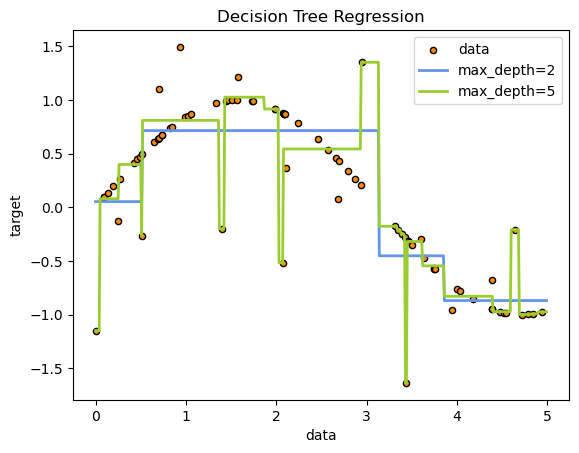

In [24]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit two regression models
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Abschließende Bemerkungen

Einige Vorteile von Entscheidungsbaum-Modellen sind:

* Sie sind einfach zu verstehen und zu interpretieren. Bäume können visualisiert werden.

* Sie erfordern nur wenig Datenvorbereitung. Andere Techniken erfordern in der Regel Daten-Normalisierung oder die Erstellung von Dummy-Variablen.

* Die Kosten für die Nutzung des Baums (d. h. Vorhersagen) sind logarithmisch in Bezug auf die Anzahl der Datenpunkte, die zum Trainieren des Baums verwendet wurden.

* Sie können numerische und kategoriale Daten verarbeiten. Andere Lerntechniken sind in der Regel auf die Analyse von Datensätzen spezialisiert, die nur einen Typ von Variable enthalten.


Credits: Dieses Notebook basiert zum Teil auf [https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch03/ch03.ipynb](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/code/ch03/ch03.ipynb)